In [4]:
import utils.filehandler as filehandler
from sklearn.neighbors import KNeighborsClassifier
import time

#import the csv file
dataset = filehandler.import_csv('../fer2018/fer2018.csv')

importing ../fer2018/fer2018.csv


C:\Users\Queen Alex\Documents\DM_ML\CW1\datamining_coursework1\src\utils\filehandler.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = data_frame.as_matrix()



importation done in: 122.98773622512817


In [5]:
#prepare 10 subsets for cross validation
set_list = filehandler.split_dataset(10, dataset)

for position in range(10):
   (x_train, y_train, x_validation, y_validation) = set_list[position]

### Classification: Performance of the Nearest Neighbour Algorithm on the given data set

In [6]:
"""
Classifier initialization
"""
knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

start_time = time.time()
knc.fit(x_train, y_train)
print(time.time() - start_time, "seconds to fit data")

118.3716926574707 seconds to fit data


In [7]:
"""
Running the algorithm. preds will hold the class predictions
"""
start_time = time.time()
preds = knc.predict(x_validation)
print(time.time() - start_time, "seconds to predict the classes")

958.2265257835388 seconds to predict the classes


In [8]:
"""
Overall accuracy calculation
"""
correct_count = (preds == y_validation).sum()
print(correct_count)
accuracy = correct_count / len(preds)
print(accuracy)

1251
0.3486622073578595


### Classification Accuracy Calculation

In [26]:
"""
Computing confusion matrix to evaluate classification accuracy
"""
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_validation, preds)

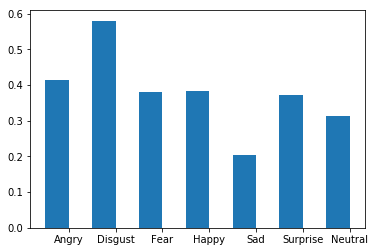

In [27]:
"""
Plotting the accuracy histogram
"""
acc = []
for i in range(len(confusion_matrix)):
    total_emote = confusion_matrix[i].sum()
    acc.append(confusion_matrix[i][i] / total_emote)
    
bar_width = .5
positions = np.arange(7)
plt.bar(positions, acc, bar_width)
plt.xticks(positions + bar_width / 2, ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'))
plt.show()

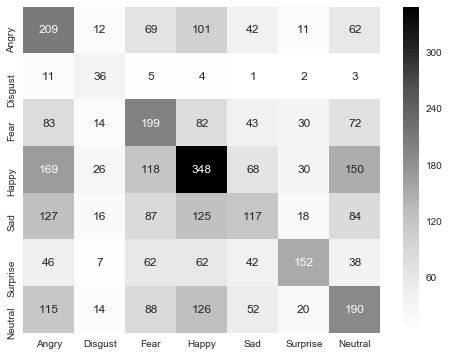

In [49]:
"""
Plotting the confusion matrix
"""
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix, index = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
                  columns = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.figure(figsize = (8, 6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='Greys')